<a href="https://colab.research.google.com/github/princevalerie/All_project/blob/main/Clustering/Credit_Clustering_Submission_Akhir_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



---


**Sumber Dataset**

Link = [Click Here!](https://www.kaggle.com/datasets/saramah/customer-data)


**Deskripsi Dataset**

Dataset ini berisi informasi transaksi dan perilaku kredit dari sejumlah pelanggan kartu kredit. Setiap baris mewakili satu pelanggan, dan terdapat beberapa kolom yang memberikan detail tentang aktivitas keuangan mereka, seperti saldo, pembelian, pembayaran, dan penggunaan kredit. Berikut adalah deskripsi singkat untuk setiap kolom tanpa menggunakan angka:

CUST_ID: Identifikasi unik untuk setiap pelanggan.

BALANCE: Saldo saat ini pada akun pelanggan.

BALANCE_FREQUENCY: Frekuensi saldo diperbarui pada akun.

PURCHASES: Total jumlah pembelian yang dilakukan.

ONEOFF_PURCHASES: Jumlah pembelian sekali bayar yang dilakukan.

INSTALLMENTS_PURCHASES: Jumlah pembelian dengan sistem cicilan.

CASH_ADVANCE: Total jumlah uang tunai yang diambil melalui kartu kredit.

PURCHASES_FREQUENCY: Frekuensi transaksi pembelian dilakukan.

ONEOFF_PURCHASES_FREQUENCY: Frekuensi transaksi pembelian sekali bayar dilakukan.

PURCHASES_INSTALLMENTS_FREQUENCY: Frekuensi transaksi pembelian cicilan dilakukan.

CASH_ADVANCE_FREQUENCY: Frekuensi pengambilan uang tunai dilakukan.

CASH_ADVANCE_TRX: Jumlah transaksi pengambilan uang tunai.

PURCHASES_TRX: Jumlah transaksi pembelian yang dilakukan.

CREDIT_LIMIT: Batas kredit maksimum pelanggan.

PAYMENTS: Total pembayaran yang dilakukan oleh pelanggan.

MINIMUM_PAYMENTS: Jumlah minimum yang dibayarkan oleh pelanggan.

PRC_FULL_PAYMENT: Persentase pembayaran penuh terhadap total tagihan.

TENURE: Durasi (dalam bulan) pelanggan menggunakan kartu kredit.




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Clustering_dicoding/Customer_Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
numeric_col

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

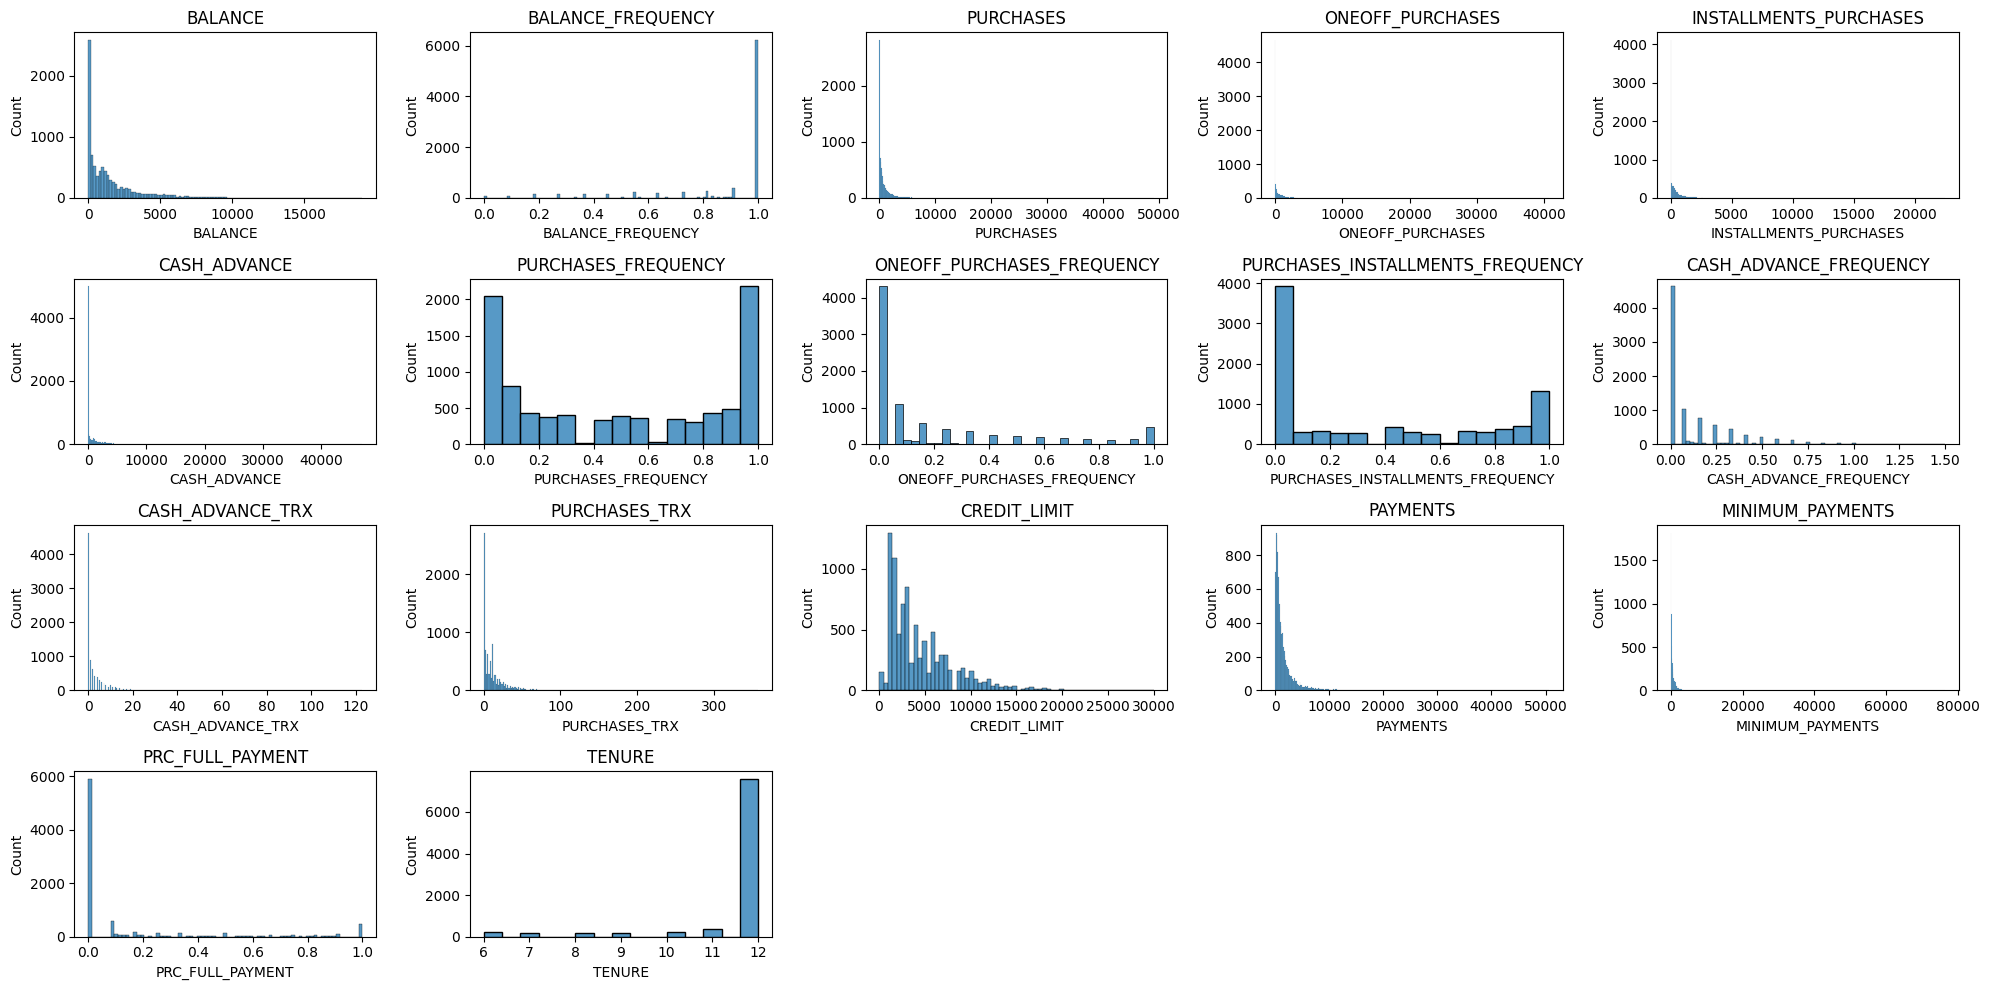

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_col):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

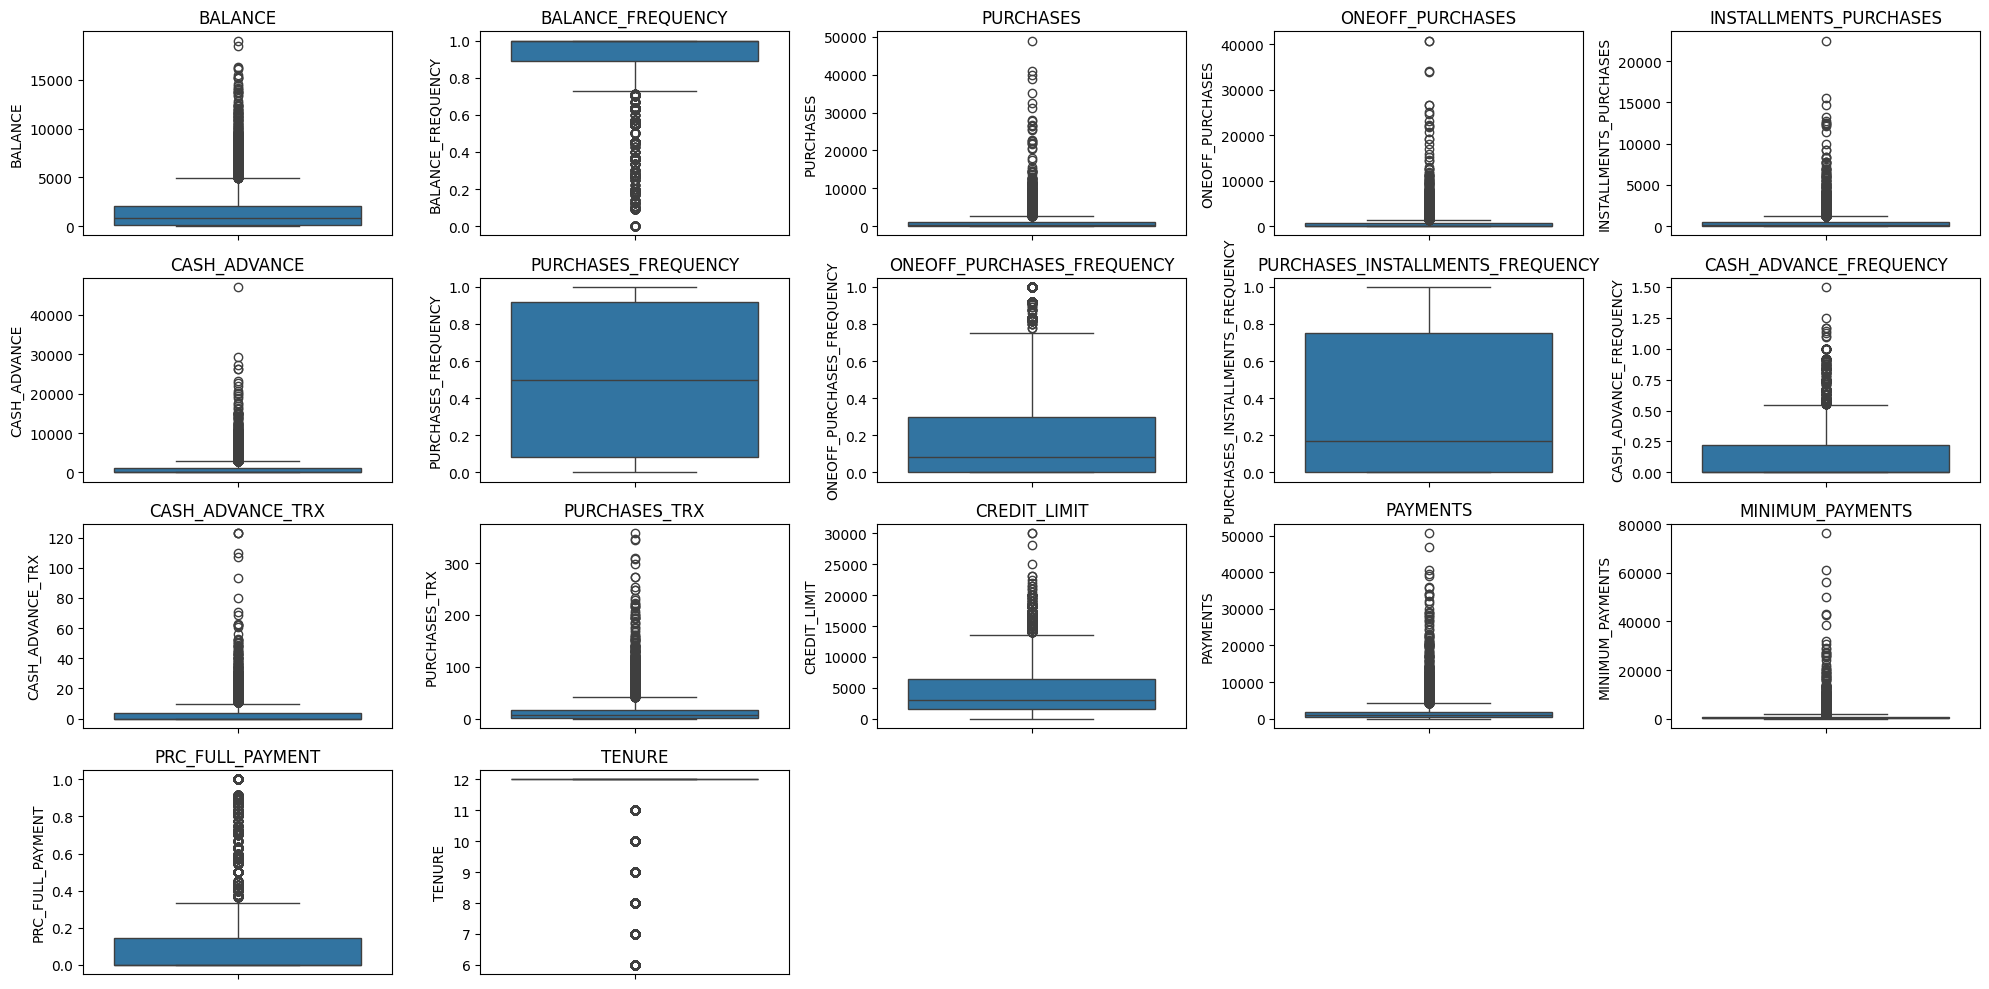

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_col):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

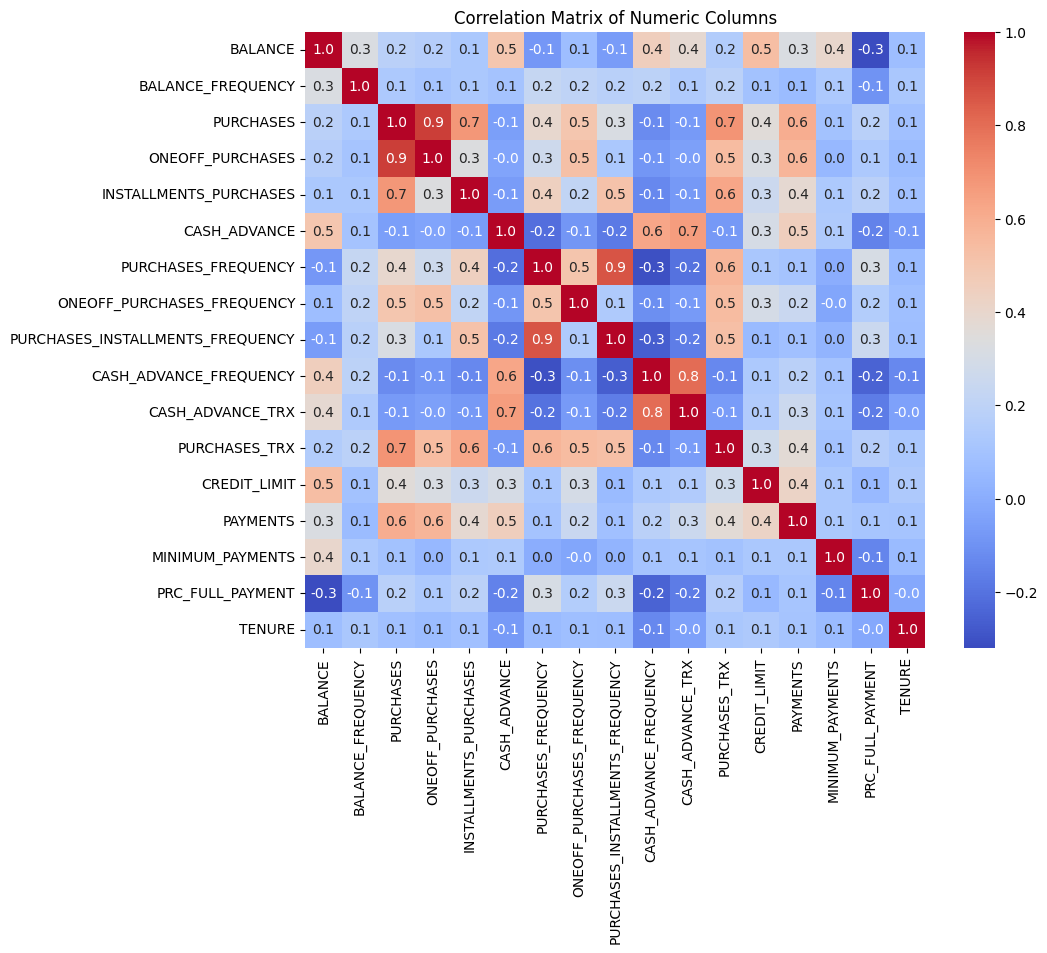

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_col].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
df = df.dropna()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df_clean=df.drop('CUST_ID',axis=1)
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Fit and transform the selected columns
scaled_data = StandardScaler().fit_transform(df_clean)

# Create a new DataFrame with scaled data
scaled_df_clean = pd.DataFrame(scaled_data, columns=df_clean.columns)

# Display the scaled DataFrame
scaled_df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_clean)

df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

df_pca

,PC1,PC2
0,-1.696395,-1.122584
1,-1.215681,2.435638
2,0.935853,-0.385202
3,-1.614638,-0.724586
4,0.223701,-0.783610
...,...,...
8631,-2.221637,-1.328411
8632,-0.362326,-2.032249
8633,-0.930026,-1.841236
8634,-2.356010,-0.718730


In [ ]:
df_pca.describe()

,PC1,PC2
count,8.636000e+03,8.636000e+03
mean,-1.316429e-17,-3.291073e-17
std,2.151705e+00,1.861191e+00
min,-2.797928e+00,-2.734723e+00
25%,-1.501037e+00,-1.266294e+00
50%,-4.400970e-01,-4.773950e-01
75%,7.716958e-01,7.412597e-01
max,2.920073e+01,2.510892e+01


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

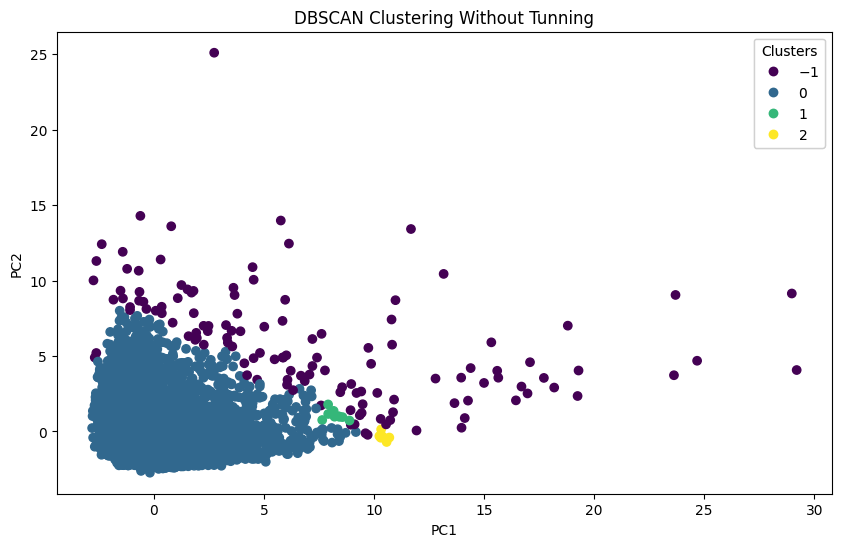

In [ ]:
df_pca2 = df_pca.copy()
dbscan = DBSCAN()
clusters = dbscan.fit_predict(df_pca2)

df_pca2['cluster'] = clusters

# Visualize the results with legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca2['PC1'], df_pca2['PC2'], c=df_pca2['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering Without Tunning')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Epsilon terbaik: 1.0
Min sampel terbaik: 4
Silhouette Score terbaik: 0.7935792063583114


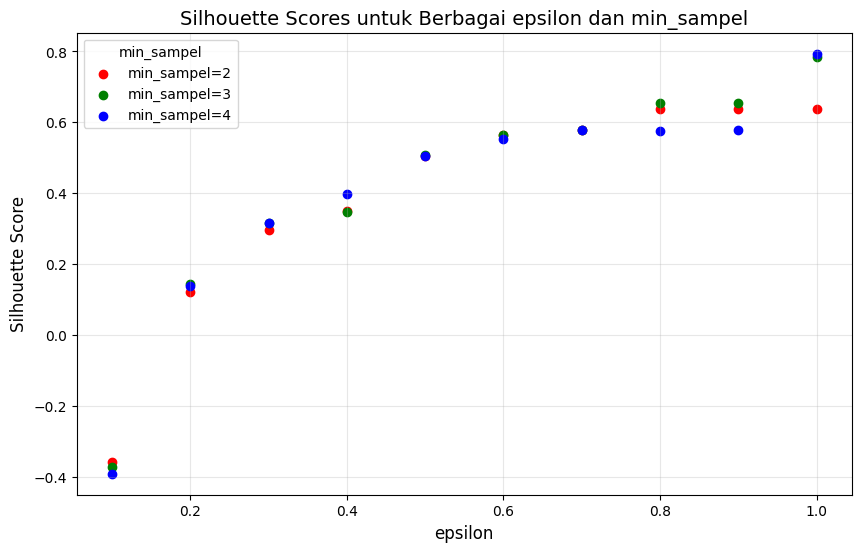

In [ ]:
# Rentang nilai parameter
nilai_epsilon = np.arange(0.1, 1.1, 0.1)
nilai_min_sampel = range(2, 5)

# Variabel untuk menyimpan parameter terbaik
epsilon_terbaik = 0
min_sampel_terbaik = 0
silhouette_terbaik = -1

# Menyimpan semua kombinasi epsilon, min_sampel, dan Silhouette Score
daftar_silhouette = []

for epsilon in nilai_epsilon:
    for min_sampel in nilai_min_sampel:
        # Buat model DBSCAN
        model_dbscan = DBSCAN(eps=epsilon, min_samples=min_sampel)
        klaster = model_dbscan.fit_predict(df_pca)

        # Hitung Silhouette Score hanya jika ada lebih dari 1 cluster
        if len(set(klaster)) > 1:  # Pastikan ada lebih dari 1 klaster
            skor = silhouette_score(df_pca, klaster)
            daftar_silhouette.append([epsilon, min_sampel, skor])

            # Simpan parameter terbaik
            if skor > silhouette_terbaik:
                silhouette_terbaik = skor
                epsilon_terbaik = epsilon
                min_sampel_terbaik = min_sampel
        else:
            daftar_silhouette.append([epsilon, min_sampel, -1])  # Jika hanya 1 klaster, Silhouette Score tidak valid

# Simpan hasil ke dalam DataFrame
dataframe_silhouette = pd.DataFrame(
    daftar_silhouette, columns=["epsilon", "min_sampel", "skor_silhouette"]
)

# Print hasil terbaik
print(f"Epsilon terbaik: {epsilon_terbaik}")
print(f"Min sampel terbaik: {min_sampel_terbaik}")
print(f"Silhouette Score terbaik: {silhouette_terbaik}")

# --- Visualisasi hasil Silhouette Scores ---
plt.figure(figsize=(10, 6))
plt.title('Silhouette Scores untuk Berbagai epsilon dan min_sampel', fontsize=14)
plt.xlabel('epsilon', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)

# Warna berbeda untuk setiap min_sampel
peta_warna = {2: 'r', 3: 'g', 4: 'b'}
label_legend = {2: 'min_sampel=2', 3: 'min_sampel=3', 4: 'min_sampel=4'}

# Scatter plot untuk Silhouette Score
for min_sampel in nilai_min_sampel:
    subset_epsilon = dataframe_silhouette[dataframe_silhouette['min_sampel'] == min_sampel]['epsilon']
    subset_skor = dataframe_silhouette[dataframe_silhouette['min_sampel'] == min_sampel]['skor_silhouette']
    plt.scatter(
        subset_epsilon,
        subset_skor,
        color=peta_warna[min_sampel],
        label=label_legend[min_sampel],
    )

# Tambahkan legenda
plt.legend(title="min_sampel", loc="best", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

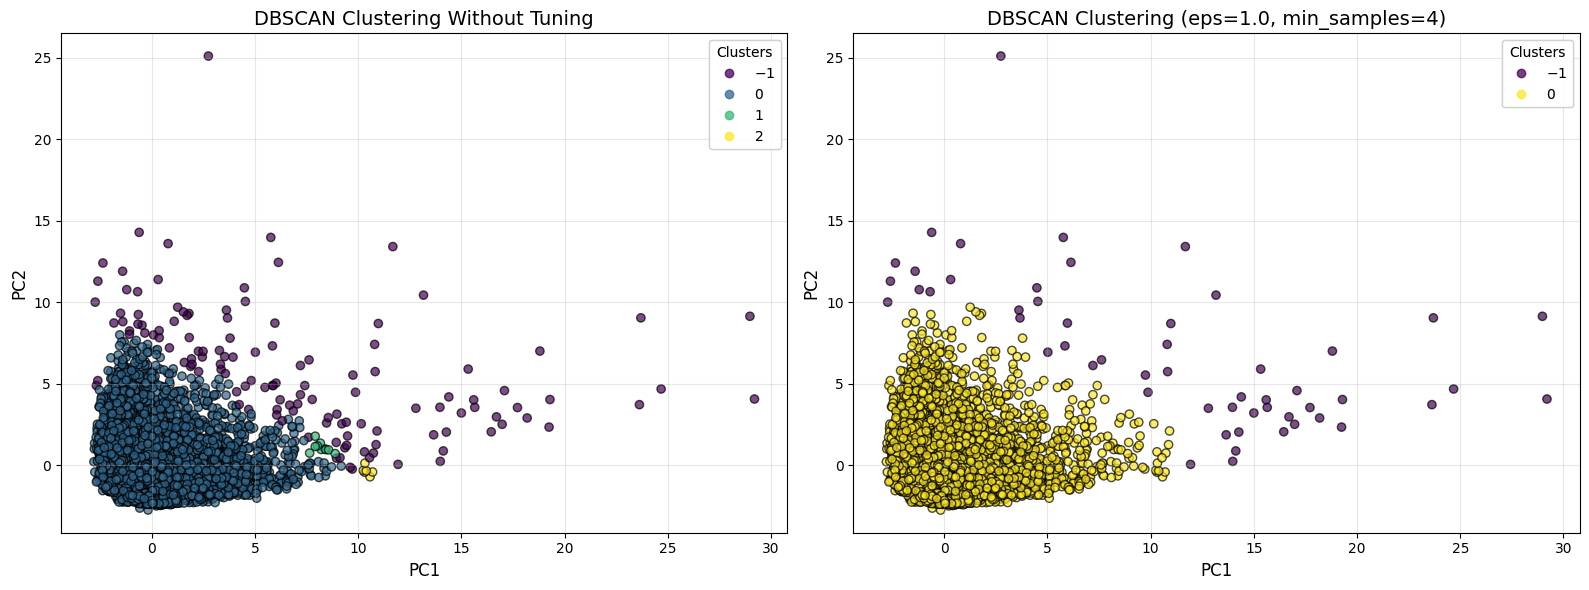

In [ ]:
# Model DBSCAN tanpa tuning hyperparameter
dbscan = DBSCAN()
df_pca2 = df_pca.copy()
clusters = dbscan.fit_predict(df_pca2)

# Model DBSCAN menggunakan hyperparameter terbaik
best_dbscan = DBSCAN(eps=epsilon_terbaik, min_samples=min_sampel_terbaik)
best_clusters = best_dbscan.fit_predict(df_pca)

# Visualisasi dalam satu baris (subplot 1x2)
plt.figure(figsize=(16, 6))

# Subplot 1: DBSCAN Clustering Without Tuning
plt.subplot(1, 2, 1)
plt.title('DBSCAN Clustering Without Tuning', fontsize=14)
scatter_1 = plt.scatter(
    df_pca2['PC1'], df_pca2['PC2'], c=clusters, cmap='viridis', alpha=0.7, edgecolor='k'
)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(alpha=0.3)
legend1 = plt.legend(*scatter_1.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Subplot 2: DBSCAN Clustering dengan Tuning
plt.subplot(1, 2, 2)
plt.title(f'DBSCAN Clustering (eps={epsilon_terbaik}, min_samples={min_sampel_terbaik})', fontsize=14)
scatter_2 = plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=best_clusters,
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(alpha=0.3)
legend2 = plt.legend(*scatter_2.legend_elements(), title="Clusters")
plt.gca().add_artist(legend2)

# Tampilkan grafik
plt.tight_layout()
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

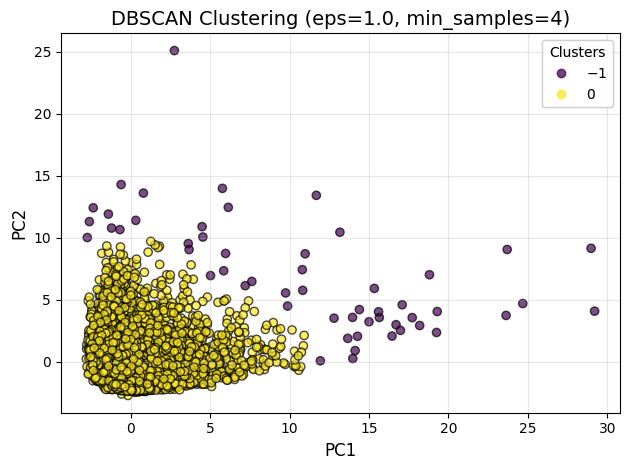

In [ ]:
plt.title(f'DBSCAN Clustering (eps={epsilon_terbaik}, min_samples={min_sampel_terbaik})', fontsize=14)
scatter_2 = plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=best_clusters,
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(alpha=0.3)
legend2 = plt.legend(*scatter_2.legend_elements(), title="Clusters")
plt.gca().add_artist(legend2)

# Tampilkan grafik
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df['cluster'] = best_clusters

df

<ipython-input-20-cf7a7f5358e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = best_clusters


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
# df[df['cluster']==0]

In [ ]:
df[df['cluster']==0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,8582.000000,8582.000000,8582.00000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.0
mean,1570.401318,0.894545,934.37224,540.290047,394.395247,951.743509,0.494236,0.203362,0.366957,0.136132,3.181077,14.483104,4463.013066,1663.208939,838.113258,0.158433,11.532626,0.0
std,2038.281057,0.208083,1542.16748,1162.228684,753.285958,1882.100694,0.400818,0.297674,0.397315,0.198938,6.110533,23.029834,3567.226918,2338.997199,2189.864440,0.295510,1.313576,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000,0.0
25%,145.785111,0.909091,42.50750,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,416.019812,168.807437,0.000000,12.000000,0.0
50%,907.831164,1.000000,372.04500,42.150000,93.235000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,889.028943,309.083618,0.000000,12.000000,0.0
75%,2069.304836,1.000000,1122.26750,584.835000,476.520000,1118.077892,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1919.524712,811.023725,0.166667,12.000000,0.0
max,18495.558550,1.000000,14454.98000,14215.000000,12541.000000,21943.849420,1.000000,1.000000,1.000000,1.500000,107.000000,309.000000,30000.000000,40627.595240,61031.618600,1.000000,12.000000,0.0


In [ ]:
# df[df['cluster']!=0]

In [ ]:
df[df['cluster']!=0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,6499.890095,0.972896,15497.488519,10873.326667,4624.161852,7737.722708,0.776347,0.610694,0.664947,0.371633,24.425926,102.462963,13911.111111,21057.291753,5026.842646,0.297592,11.814815,-1.0
std,4267.875536,0.108438,12859.233473,11635.945997,5204.661431,10635.404801,0.377506,0.392516,0.414422,0.412886,35.814302,97.957386,5560.292739,10624.462467,11087.354168,0.377842,0.754210,0.0
min,1268.809031,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,1083.433387,310.712671,0.000000,7.000000,-1.0
25%,3001.528022,1.000000,4386.132500,766.735000,330.407500,0.000000,0.604167,0.255682,0.333333,0.000000,0.000000,33.000000,10125.000000,13839.491535,728.774287,0.000000,12.000000,-1.0
50%,5306.528946,1.000000,14645.485000,5339.835000,3027.470000,1834.014549,1.000000,0.708333,0.916667,0.083333,2.000000,75.500000,13800.000000,20267.297255,1667.122861,0.083333,12.000000,-1.0
75%,8819.839338,1.000000,24720.472500,19128.590000,7542.457500,14658.989417,1.000000,1.000000,1.000000,0.833333,35.750000,139.000000,17375.000000,27104.341720,3105.178555,0.551136,12.000000,-1.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,-1.0


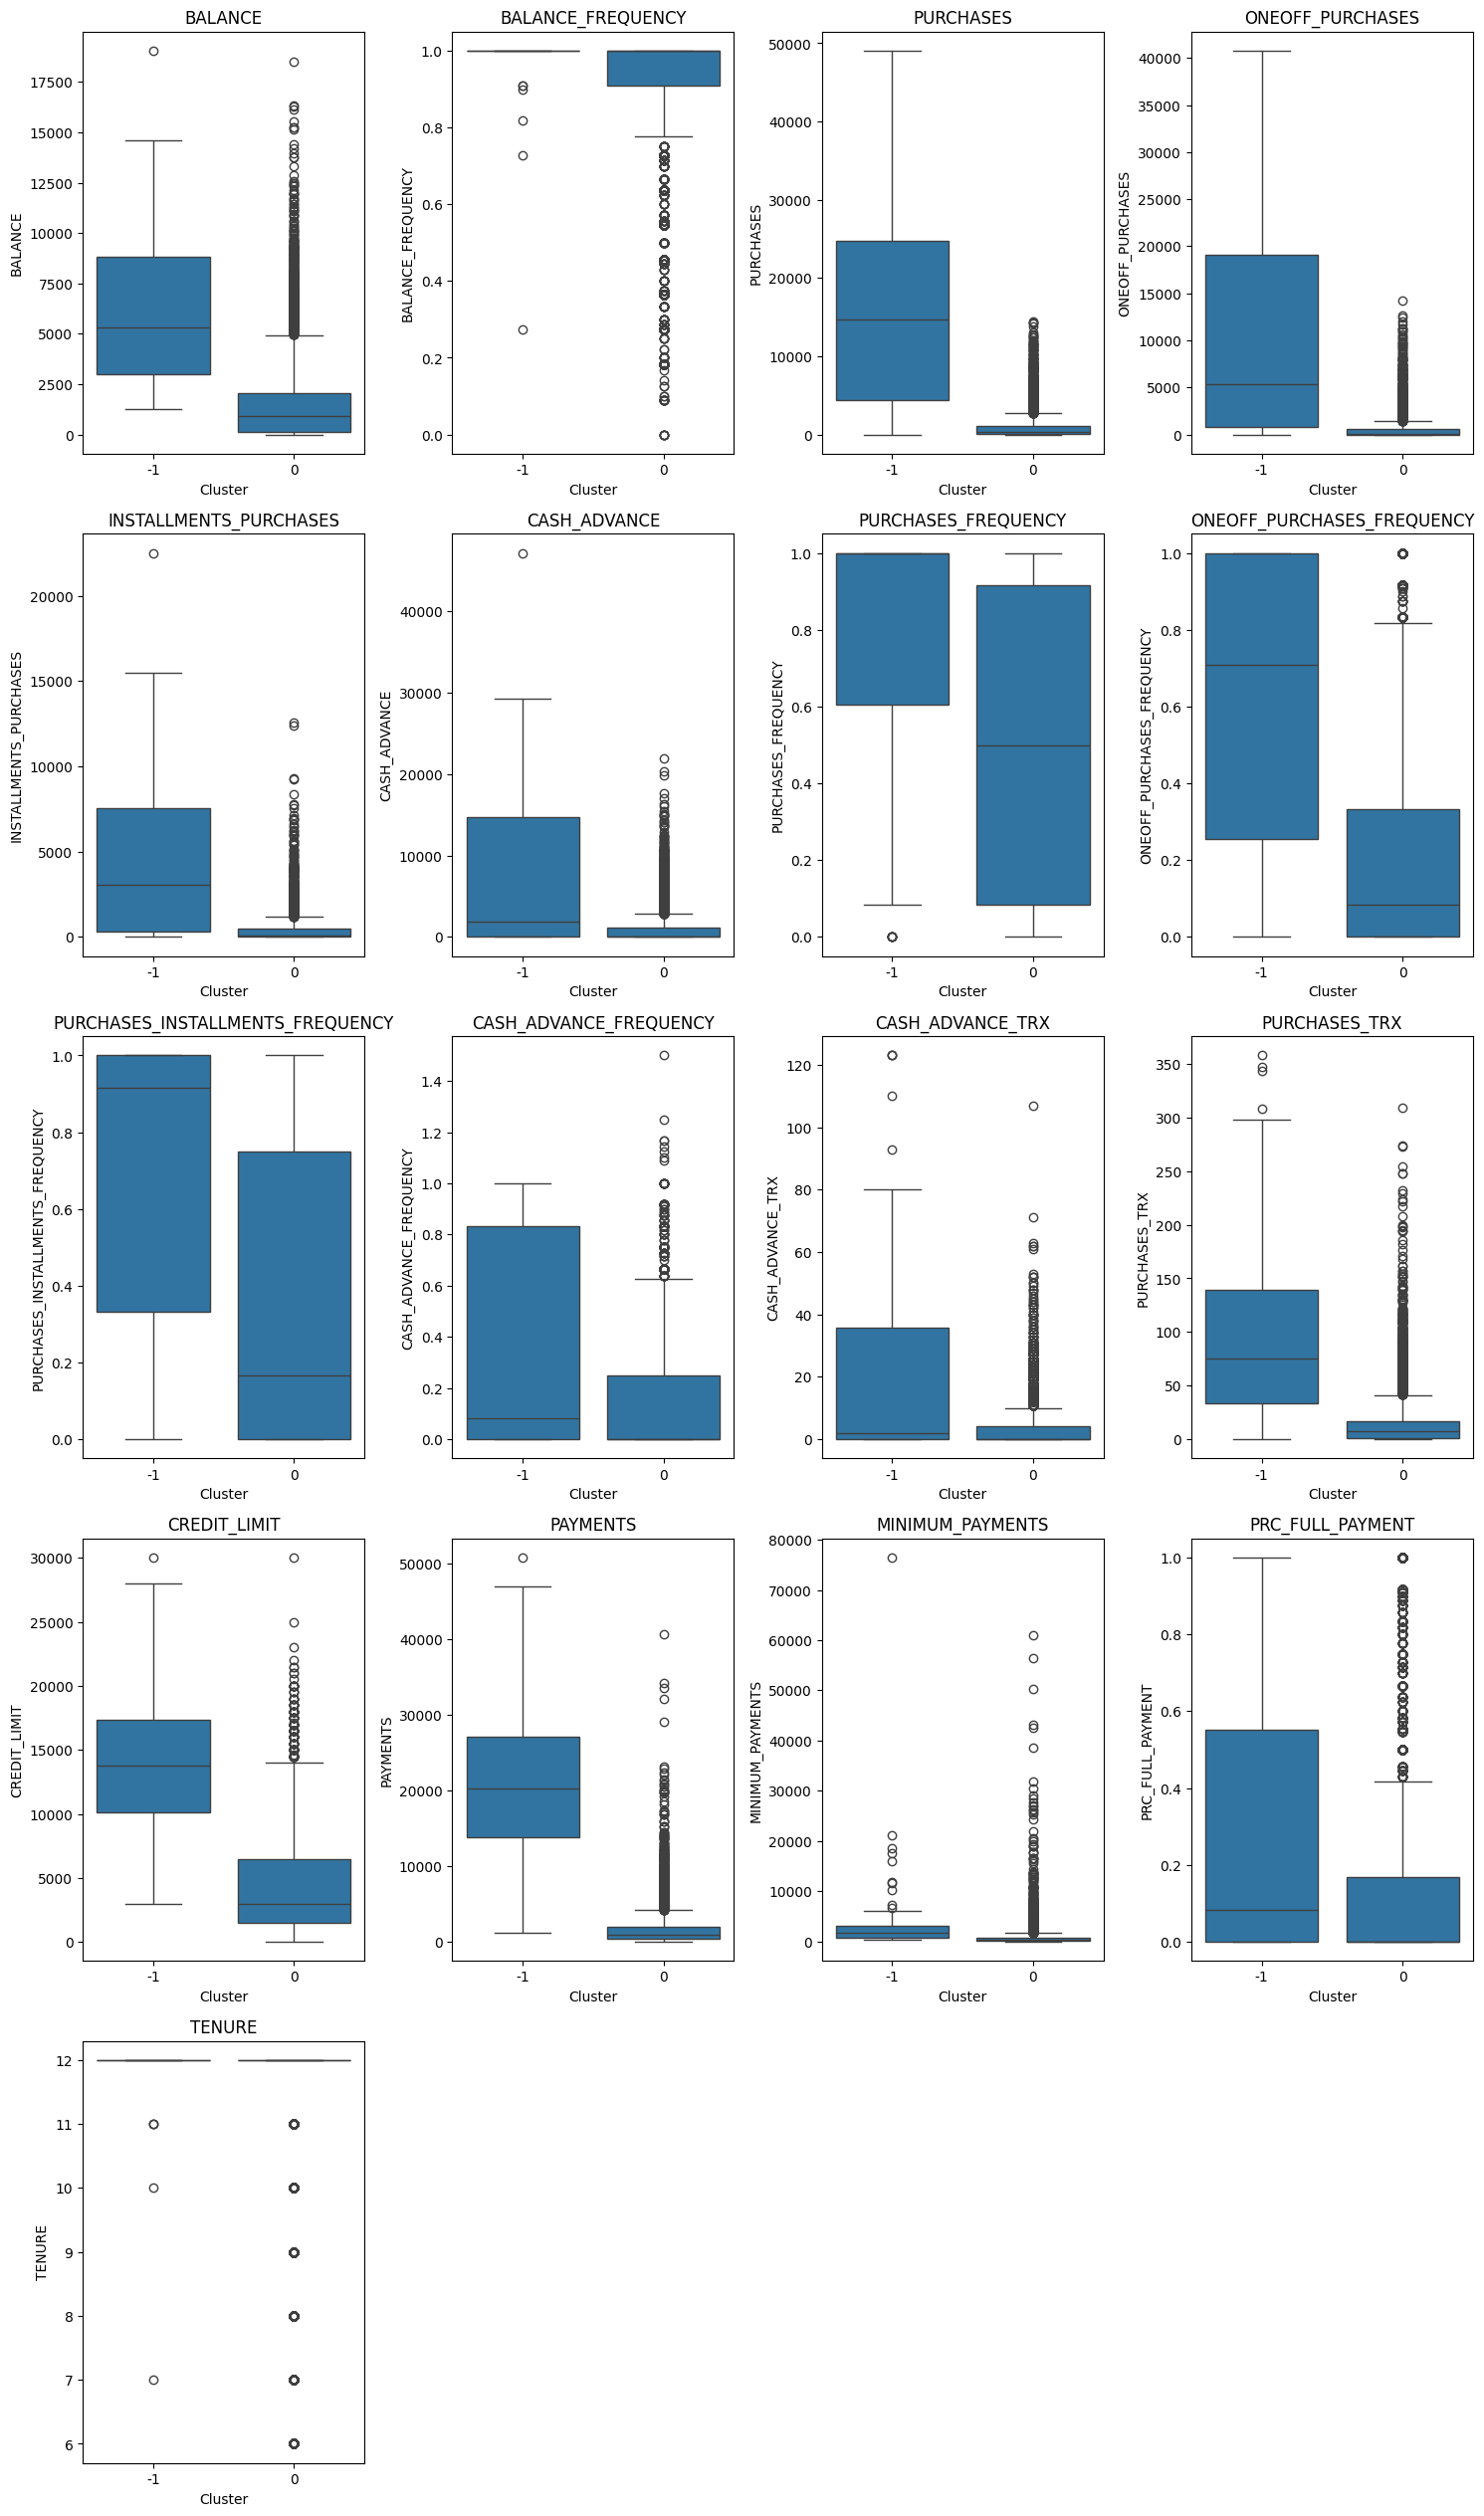

In [ ]:
# Filter data untuk klaster 0 dan -1
data_klaster_0 = df[df['cluster'] == 0]
data_klaster_minus1 = df[df['cluster'] == -1]

# Buat subplots
jumlah_fitur = len(numeric_col)
jumlah_baris = (jumlah_fitur + 2) // 3  # Hitung jumlah baris untuk subplots
fig, sumbu = plt.subplots(nrows=jumlah_baris, ncols=4, figsize=(15, 5 * jumlah_baris))
sumbu = sumbu.flatten()

# Iterasi melalui fitur dan buat box plot
for indeks, fitur in enumerate(numeric_col):
    sns.boxplot(x='cluster', y=fitur, data=pd.concat([data_klaster_0, data_klaster_minus1]), ax=sumbu[indeks])
    sumbu[indeks].set_title(f'{fitur}')
    sumbu[indeks].set_xlabel('Cluster')

# Sembunyikan subplot yang tidak digunakan jika jumlah fitur bukan kelipatan 3
for sisa in range(indeks + 1, len(sumbu)):
    sumbu[sisa].set_visible(False)

# Atur tata letak dan tampilkan plot
plt.tight_layout()

# Simpan plot ke file
plt.savefig("boxplot_klaster.png", dpi=300)

# Tampilkan plot
plt.show()


---

### **Cluster -1: "High Balance, High Cash Advance Users"**
**Karakteristik Utama:**
- **Balance (Saldo):** Sangat tinggi, dengan **median ~5.300**.
- **Cash Advance (Penarikan Tunai):** Dominan, dengan **median ~1.800** dan rentang hingga **47.137**.
- **Minimum Payments (Pembayaran Minimum):** Sangat tinggi, dengan **median ~20.267**.
- **Credit Limit (Limit Kredit):** Tinggi, dengan **median ~13.800**.
- **Purchases:** Aktivitas belanja cenderung **rendah**, mayoritas tidak melakukan pembelian (median `PURCHASES` ~14.645).


**Deskripsi Singkat:**
Cluster ini terdiri dari pelanggan dengan **saldo dan pembayaran minimum yang sangat tinggi**. Namun, mereka lebih memanfaatkan kartu kredit untuk **penarikan tunai** dibandingkan untuk transaksi pembelian. Limit kredit mereka juga cukup besar.

---

### **Cluster 0: "Low Balance, Moderate Purchasers"**
**Karakteristik Utama:**
- **Balance (Saldo):** Rendah, dengan **median ~907**.
- **Cash Advance (Penarikan Tunai):** Rendah, dengan **median ~0**.
- **Purchases:** Cenderung **moderat**, dengan median `PURCHASES` **~372**.
- **Minimum Payments (Pembayaran Minimum):** Rendah, dengan **median ~889**.
- **Credit Limit (Limit Kredit):** Lebih kecil dibanding Cluster -1, dengan **median ~3.000**.


**Deskripsi Singkat:**
Pelanggan di Cluster ini memiliki **saldo rendah** dan cenderung **aktif dalam pembelian dengan nilai sedang**. Mereka jarang atau tidak menggunakan cash advance, dengan limit kredit yang lebih kecil dibanding Cluster -1.

---

### **Perbandingan Signifikan Antar Cluster:**

| **Metrik**          | **Cluster -1**          | **Cluster 0**          | **Keterangan**                              |
|----------------------|-------------------------|-------------------------|---------------------------------------------|
| **Balance**          | ~5.300                 | ~907                   | Cluster -1 memiliki saldo jauh lebih tinggi. |
| **Cash Advance**     | Dominan (~1.800)       | Hampir tidak digunakan | Cluster -1 sangat aktif dalam penarikan tunai. |
| **Purchases**        | Rendah (~14.645)       | Moderat (~372)         | Cluster 0 lebih aktif dalam pembelian.      |
| **Credit Limit**     | Tinggi (~13.800)       | Rendah (~3.000)        | Cluster -1 memiliki limit kredit lebih besar. |
| **Minimum Payments** | Sangat tinggi (~20.267) | Rendah (~889)          | Cluster -1 jauh lebih tinggi pada pembayaran minimum. |


### **Strategi Penanganan yang Dapat Dipertimbangkan Untuk Dieksekusi**

---
Pendekatan berbeda diperlukan untuk kedua cluster ini. **Cluster -1** membutuhkan strategi untuk mengurangi cash advance dan meningkatkan pembelian, sedangkan **Cluster 0** memerlukan insentif untuk meningkatkan volume transaksi serta limit kredit.

---

### **Cluster -1: "High Balance, High Cash Advance Users"**  
**Tujuan Utama:** Mengurangi penggunaan cash advance dan meningkatkan transaksi pembelian.  

1. **Program Reward Transaksi Pembelian:**  
   - **Implementasi Cepat:**  
     - Luncurkan **program reward sementara** seperti cashback atau poin tambahan untuk transaksi pembelian di kategori tertentu (e.g., groceries, elektronik, atau fashion).  
     - Promosi melalui SMS/email blast dengan pesan seperti:  
       *"Nikmati cashback 5% untuk setiap pembelian menggunakan kartu Anda hingga akhir bulan ini!"*  
     - Gunakan media sosial untuk mempromosikan program.  

2. **Promosi Pengurangan Cash Advance:**  
   - **Insentif Bunga Lebih Rendah:**  
     - Berikan **bunga lebih rendah untuk pembelian langsung** (misalnya, 1,5% vs. 3% untuk cash advance).  
     - Tambahkan penawaran eksklusif seperti cicilan ringan untuk pembelian di merchant tertentu.  

3. **Edukasi Finansial Proaktif:**  
   - **Kampanye Digital Cepat:**  
     - Buat infografik singkat tentang **risiko penggunaan cash advance** vs. manfaat pembelian langsung.  
     - Publikasikan di platform digital perusahaan, termasuk aplikasi mobile banking, media sosial, dan email pelanggan.  

4. **Targeted Engagement untuk Pengguna Tinggi Cash Advance:**  
   - Identifikasi pengguna dengan **proporsi cash advance tinggi (>50%)**.  
   - Kirim penawaran personal melalui call center atau push notification, seperti:  
     *"Gunakan kartu Anda untuk pembelian langsung dan nikmati bunga lebih rendah serta reward eksklusif bulan ini!"*  

---

### **Cluster 0: "Low Balance, Moderate Purchasers"**  
**Tujuan Utama:** Meningkatkan pembelian dan loyalitas pelanggan.  

1. **Insentif Pembelian Lebih Besar:**  
   - **Diskon dan Promo Langsung:**  
     - Tawarkan diskon **instan 10% untuk pembelian di atas Rp 500.000** di mitra merchant populer.  
     - Kirim SMS blast:  
       *"Belanja di merchant favorit Anda dengan diskon 10% khusus pengguna kartu ini!"*  
   - **Promo Cicilan 0%:**  
     - Kerja sama dengan merchant untuk menyediakan cicilan 0% dengan nominal minimum pembelian.  

2. **Peningkatan Limit Kredit Secara Bertahap:**  
   - **Penilaian Otomatis:**  
     - Jalankan evaluasi instan terhadap pelanggan dengan skor kredit baik untuk peningkatan limit hingga **10-20%**.  
   - **Komunikasi Cepat:**  
     - Kirim notifikasi kepada pelanggan terpilih:  
       *"Selamat! Limit kredit Anda telah ditingkatkan untuk mendukung gaya hidup Anda."*  

3. **Program Loyalitas yang Relevan:**  
   - **Poin Reward & Penukaran:**  
     - Tawarkan **poin reward tambahan untuk setiap transaksi selama periode tertentu**.  
     - Buat hadiah yang mudah diakses seperti voucher belanja atau diskon produk elektronik.  

4. **Engagement dengan Program Komunitas:**  
   - Tawarkan keikutsertaan dalam program loyalitas berbasis komunitas, seperti diskon untuk event lokal atau voucher makan malam.  

---

### **Eksekusi Umum untuk Kedua Cluster**  

1. **Komunikasi Personal dengan Segmentasi Dinamis:**  
   - Gunakan data analitik untuk mengirimkan pesan pemasaran yang sesuai dengan pola transaksi setiap cluster.  
   - Contoh: Kirimkan reminder mingguan tentang promo berjalan atau reward program melalui email atau aplikasi mobile.  

2. **Monitoring dan Feedback Cepat:**  
   - Pantau efektivitas strategi melalui laporan harian:  
     - Perubahan volume transaksi pembelian.  
     - Penurunan jumlah cash advance.  
   - Dapatkan masukan pelanggan melalui survei singkat di aplikasi.  

3. **Kolaborasi dengan Merchant:**  
   - Segera perkuat kerja sama dengan merchant untuk memberikan promo eksklusif.  

### **Prioritas Eksekusi (Tiga Bulan ke Depan):**  
- **Bulan 1:** Luncurkan program reward dan edukasi finansial.  
- **Bulan 2:** Implementasi peningkatan limit kredit dan promo cicilan.  
- **Bulan 3:** Evaluasi dampak strategi dan perluas promo ke cluster lainnya.  

Dengan strategi ini, pelanggan di kedua cluster akan lebih terlibat, meningkatkan transaksi, dan menurunkan risiko ketergantungan pada cash advance.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files
df.to_csv('clustered_credit.csv', encoding = 'utf-8-sig',index=False)
files.download('clustered_credit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>